In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [2]:
# Replace parts of url with variables
site = '09506000'
start = '2020-08-22'
end = '2020-12-05'  # Update end date each week to Saturday

url = "https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=" + \
    site + "&referred_module=sw&period=&begin_date=" + start + "&end_date=" + \
    end
data = pd.read_table(url, skiprows=30, names=['agency_cd', 'site_no',
                                              'datetime', 'flow', 'code'],
                     parse_dates=['datetime'])

In [3]:
flow_weekly = data.resample("W-SAT", on='datetime').mean()

In [4]:
for i in range(1, 2):
    flow_weekly['flow_tm%s' % i] = flow_weekly['flow'].shift(i)

In [5]:
# finds the weekly percent change
pch = []
for i in range(2,len(flow_weekly)):
    pch.append((flow_weekly['flow'][i]-flow_weekly['flow_tm1'][i])/flow_weekly['flow_tm1'][i])


In [6]:
meanch = statistics.mean(pch[10:]) 

wk1 = flow_weekly['flow'][15] + flow_weekly['flow'][15] * meanch
wk2 = wk1 + wk1 * meanch
print(wk1, wk2)

169.43007919363396 180.8693628703218


In [7]:
site = '09506000'
start = '2010-08-22'
end = '2020-12-05'  # Update end date each week to Saturday

url = "https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=" + \
    site + "&referred_module=sw&period=&begin_date=" + start + "&end_date=" + \
    end
data = pd.read_table(url, skiprows=30, names=['agency_cd', 'site_no',
                                              'datetime', 'flow', 'code'],
                     parse_dates=['datetime'])
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day

In [8]:
# Aggregate flow values to weekly
flow_weekly = data.resample("W-SAT", on='datetime').mean()
flow_weekly = flow_weekly[(flow_weekly.flow <= 400)]
# getting rid of 2020 data fo next cell
data = data[(data.flow <= 400) & (data.year < 2020)]

In [9]:
weeklytemp = []
for i in range(8, 13):
    q = 0.1
    weeklytemp.append(data['flow'][(data['month'] == i)
                                    & (data['day'] <= 7)].quantile(q))
    weeklytemp.append(data['flow'][(data['month'] == i) & (data['day'] > 7) &
                                    (data['day'] <= 14)].quantile(q))
    weeklytemp.append(data['flow'][(data['month'] == i) & (data['day'] > 14)
                                    & (data['day'] <= 21)].quantile(q))
    weeklytemp.append(data['flow'][(data['month'] == i)
                                    & (data['day'] >= 22)].quantile(q))
weeklytemp = weeklytemp[3:19]

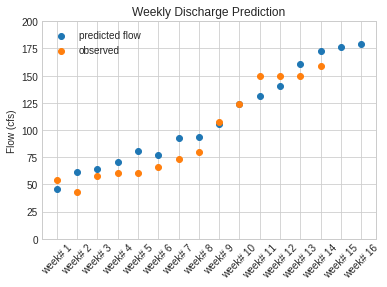

In [10]:
weeks = []

for i in range(16):
    weeks.append('week# ' '%s' % (i+1))

plt.style.use('seaborn-whitegrid')

plt.scatter(x=weeks, y=weeklytemp, marker='o', label='predicted flow')
plt.scatter(x=weeks[0:14],
            y=flow_weekly.flow[(flow_weekly['year'] == 2020)
            & (flow_weekly['month'] >= 8) & (flow_weekly['day'] >= 20) |
            (flow_weekly['year'] == 2020) & (flow_weekly['month'] >= 9)],
            marker='o', label='observed')

plt.ylabel('Flow (cfs)')
plt.ylim([0, 200])
plt.title('Weekly Discharge Prediction')
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.savefig('Discharge_Prediction.png')